In [22]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import gymnasium as gym
import os
import copy

In [23]:
env = gym.make('CliffWalking-v0')

In [24]:
numeps = 1000
epsilon = 0.1
alpha = 0.1
gamma = 1

In [25]:
def epsilon_greedy(env,Q,epsilon):
  def policy(state):
    if state not in Q:
      return np.random.choice(env.action_space.n)
    else:
      if np.random.random() < epsilon:
        return np.random.choice(env.action_space.n)
      else:
        return np.argmax(Q[state])
  return policy      

In [26]:
def action_probabilities(state,Q,epsilon,numactions):
  if state not in Q:
    return np.ones(numactions)/numactions
  
  probs = np.ones(numactions)*epsilon/numactions
  greedy = np.argmax(Q[state])
  probs[greedy] += (1 - epsilon)
  return probs
  

In [27]:
def expected_sarsa(env,numeps,epsilon,alpha,gamma):
  nA = env.action_space.n
  Q = defaultdict(lambda: np.zeros(nA))
  policy = epsilon_greedy(env,Q,epsilon)
  reward_history = np.zeros(numeps)
  for i in range(numeps):
    if i % 500 == 0:
      print(f'epsiode: {i}')
    state, _ = env.reset()
    done = False
    epreward = 0
    while not done: 
      action = policy(state)
      tup = env.step(action)
      next_state,reward,terminated,truncated = tup[0], tup[1], tup[2], tup[3]
      done = terminated or truncated
      next_action_probs = action_probabilities(next_state,Q,epsilon,nA)
      expected_value = np.sum(next_action_probs*Q[next_state])
      Q[state][action] = Q[state][action] + alpha*(reward + gamma*expected_value - Q[state][action])
      state = next_state
      epreward += reward
    reward_history[i] = epreward
  return Q, reward_history      
      

In [28]:
Q, reward_history = expected_sarsa(env,numeps,epsilon,alpha,gamma)

epsiode: 0
epsiode: 500


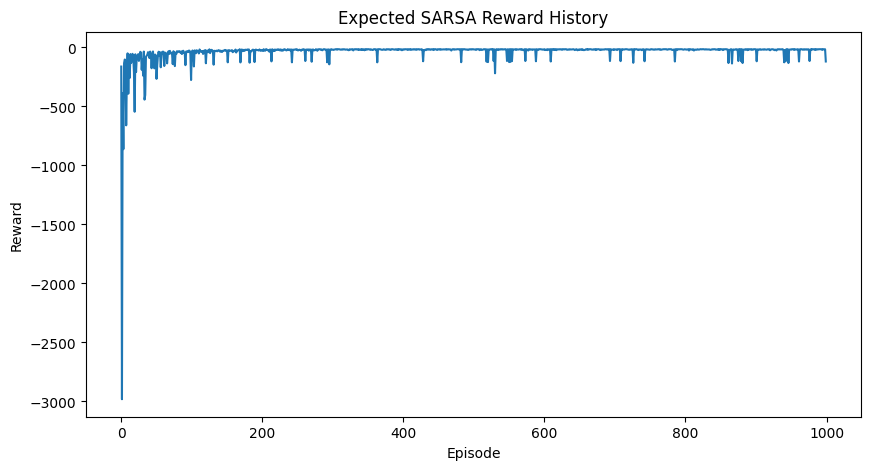

In [29]:
def plot_rewards(reward_history):
  plt.figure(figsize=(10, 5))
  plt.plot(reward_history)
  plt.xlabel("Episode")
  plt.ylabel("Reward")
  plt.title("Expected SARSA Reward History")
  plt.show()
plot_rewards(reward_history)